In [ ]:
!git clone https://github.com/anantgupta129/ERA-V1.git
!pip install torchinfo torch-lr-finder -q

Cloning into 'ERA-V1'...
remote: Enumerating objects: 250, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 250 (delta 130), reused 198 (delta 79), pack-reused 0
Receiving objects: 100% (250/250), 2.58 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
# !rm -rf /content/ERA-V1
%cd ERA-V1/session10

/content/ERA-V1/session10


In [ ]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models import CustomResNet as Net
from dataset import build_cifar

# Load Data

In [ ]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_loader = build_cifar(set="train", **kwargs)
test_loader = build_cifar(set="test", **kwargs)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)

cuda


In [ ]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CustomResNet                             [1, 10]                   --
├─Sequential: 1-1                        [1, 64, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 64, 32, 32]           1,728
│    └─BatchNorm2d: 2-2                  [1, 64, 32, 32]           128
│    └─ReLU: 2-3                         [1, 64, 32, 32]           --
│    └─Dropout2d: 2-4                    [1, 64, 32, 32]           --
├─Sequential: 1-2                        [1, 128, 16, 16]          --
│    └─Conv2d: 2-5                       [1, 128, 32, 32]          73,728
│    └─MaxPool2d: 2-6                    [1, 128, 16, 16]          --
│    └─BatchNorm2d: 2-7                  [1, 128, 16, 16]          256
│    └─ReLU: 2-8                         [1, 128, 16, 16]          --
│    └─Dropout2d: 2-9                    [1, 128, 16, 16]          --
│    └─ResBlock: 2-10                    [1, 128, 16, 16]          --
│    │

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.87E-02


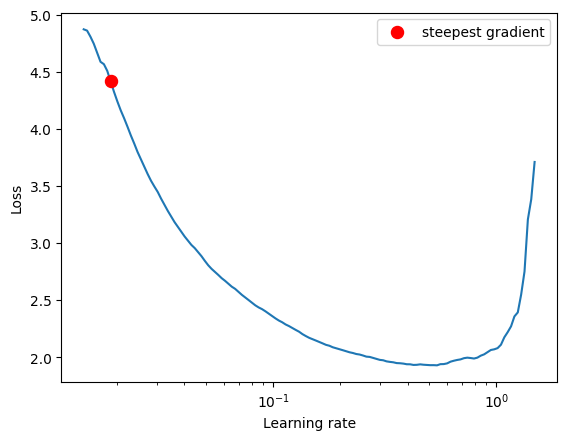

In [ ]:
from torch.nn import CrossEntropyLoss
from utils import find_lr

model = Net(drop=0.02).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)  #

find_lr(model, device, optimizer, criterion=CrossEntropyLoss(), dataloader=train_loader)

In [ ]:
from torch.optim.lr_scheduler import OneCycleLR
from utils import Trainer


num_epochs = 24

scheduler = OneCycleLR(
    optimizer,
    max_lr=1.87e-02,
    steps_per_epoch=len(train_loader),
    epochs=num_epochs,
    pct_start=5 / num_epochs,
    div_factor=100,
    three_phase=False,
    final_div_factor=100,
    anneal_strategy="linear",
)

# scheduler = None
trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.evaluate(test_loader)

Epoch 1


Train: Loss=1.3658 Batch_id=97 Accuracy=41.45: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]


Test set: Average loss: 1.2123, Accuracy: 5727/10000 (57.27%)

Epoch 2


Train: Loss=1.0456 Batch_id=97 Accuracy=59.82: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.9961, Accuracy: 6729/10000 (67.29%)

Epoch 3


Train: Loss=0.8974 Batch_id=97 Accuracy=66.20: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]


Test set: Average loss: 1.1278, Accuracy: 6804/10000 (68.04%)

Epoch 4


Train: Loss=0.7038 Batch_id=97 Accuracy=70.39: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]


Test set: Average loss: 0.8053, Accuracy: 7434/10000 (74.34%)

Epoch 5


Train: Loss=0.7948 Batch_id=97 Accuracy=75.06: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]


Test set: Average loss: 0.7442, Accuracy: 7613/10000 (76.13%)

Epoch 6


Train: Loss=0.5759 Batch_id=97 Accuracy=77.85: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]


Test set: Average loss: 0.4743, Accuracy: 8393/10000 (83.93%)

Epoch 7


Train: Loss=0.6248 Batch_id=97 Accuracy=80.66: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]


Test set: Average loss: 0.5424, Accuracy: 8181/10000 (81.81%)

Epoch 8


Train: Loss=0.4858 Batch_id=97 Accuracy=82.08: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.4354, Accuracy: 8570/10000 (85.70%)

Epoch 9


Train: Loss=0.4958 Batch_id=97 Accuracy=83.71: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.3994, Accuracy: 8663/10000 (86.63%)

Epoch 10


Train: Loss=0.4568 Batch_id=97 Accuracy=84.84: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s]


Test set: Average loss: 0.3828, Accuracy: 8685/10000 (86.85%)

Epoch 11


Train: Loss=0.4801 Batch_id=97 Accuracy=85.73: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]


Test set: Average loss: 0.3590, Accuracy: 8785/10000 (87.85%)

Epoch 12


Train: Loss=0.4143 Batch_id=97 Accuracy=86.65: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]


Test set: Average loss: 0.3684, Accuracy: 8808/10000 (88.08%)

Epoch 13


Train: Loss=0.4292 Batch_id=97 Accuracy=87.52: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]


Test set: Average loss: 0.3150, Accuracy: 9019/10000 (90.19%)

Epoch 14


Train: Loss=0.2940 Batch_id=97 Accuracy=88.18: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]


Test set: Average loss: 0.3005, Accuracy: 9003/10000 (90.03%)

Epoch 15


Train: Loss=0.2638 Batch_id=97 Accuracy=89.29: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.2987, Accuracy: 9023/10000 (90.23%)

Epoch 16


Train: Loss=0.2499 Batch_id=97 Accuracy=89.73: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.2991, Accuracy: 9023/10000 (90.23%)

Epoch 17


Train: Loss=0.3215 Batch_id=97 Accuracy=90.47: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.2853, Accuracy: 9115/10000 (91.15%)

Epoch 18


Train: Loss=0.2817 Batch_id=97 Accuracy=90.91: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


Test set: Average loss: 0.2671, Accuracy: 9155/10000 (91.55%)

Epoch 19


Train: Loss=0.1560 Batch_id=97 Accuracy=91.63: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]


Test set: Average loss: 0.2811, Accuracy: 9135/10000 (91.35%)

Epoch 20


Train: Loss=0.1861 Batch_id=97 Accuracy=92.26: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]


Test set: Average loss: 0.2555, Accuracy: 9234/10000 (92.34%)

Epoch 21


Train: Loss=0.1393 Batch_id=97 Accuracy=92.72: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


Test set: Average loss: 0.2480, Accuracy: 9234/10000 (92.34%)

Epoch 22


Train: Loss=0.1632 Batch_id=97 Accuracy=93.54: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.2400, Accuracy: 9274/10000 (92.74%)

Epoch 23


Train: Loss=0.1592 Batch_id=97 Accuracy=94.05: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.2369, Accuracy: 9310/10000 (93.10%)

Epoch 24


Train: Loss=0.1658 Batch_id=97 Accuracy=94.42: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


Test set: Average loss: 0.2346, Accuracy: 9324/10000 (93.24%)



Set	 Max Acc@Epoch	 Last Epoch Acc
train	 94.42@24		94.42
test	 93.24@24		93.24


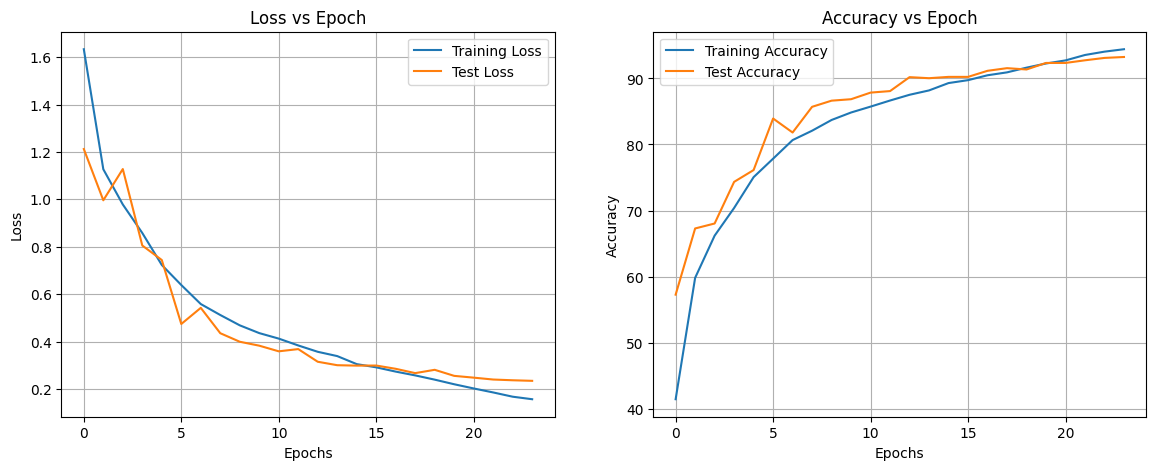

In [ ]:
trainer.plot_history()

# Evaluate

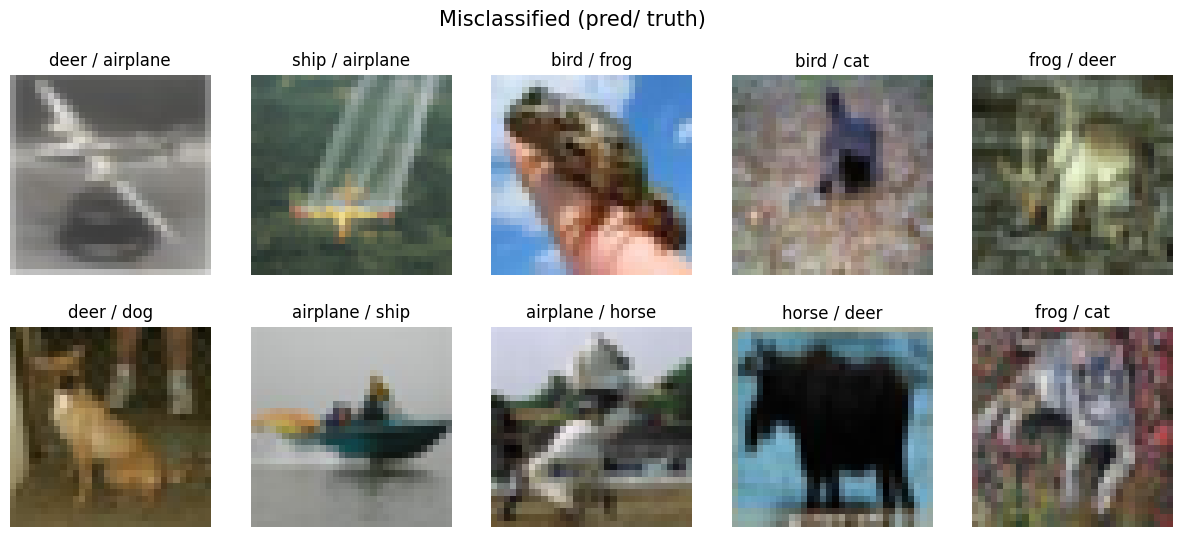

In [ ]:
from dataset import make_transform
from utils import plot_misclassified, per_class_accuracy

test_transforms = make_transform("test")
plot_misclassified(model, test_loader, device, test_transforms)

In [ ]:
per_class_accuracy(model, device, test_loader)

[x] Accuracy of ::
	[*] airplane : 100 %
	[*] automobile : 96 %
	[*]     bird : 88 %
	[*]      cat : 76 %
	[*]     deer : 94 %
	[*]      dog : 95 %
	[*]     frog : 100 %
	[*]    horse : 100 %
	[*]     ship : 100 %
	[*]    truck : 85 %
